# 4. Spectrum and Lightcurve Extraction (Script 04)
Now that the event file has been filtered for high-background flaring intervals and corrected for pile-up (if necessary), we proceed to the generation of the final scientific products.

This script (04_extract_spectrum.sh) uses the filtered event list and the specific source/background regions defined in the previous steps to extract the energy spectrum and timing data. It automates several SAS tasks to ensure the data is calibrated and ready for fitting.

### Key operations performed by this script:

Spectra Extraction: Extracts source and background spectra using evselect.

Area Scaling: Runs backscale to calculate the accurate geometrical area of the source and background regions, accounting for CCD gaps or bad pixels.

Response Generation: Generates the Redistribution Matrix File (RMF) using rmfgen and the Ancillary Response File (ARF) using arfgen. These are required to fit models in XSPEC.

Lightcurve Correction: Extracts a raw lightcurve and runs epiclccorr to correct for vignetting, bad pixels, dead time, and background subtraction.

Workflow:

    Run: Execute the script below. It will read the configuration from the environment variables (Project Root and
    ObsID) and process the clean event file.


    Sanity Check: Once the script completes, the notebook will automatically displa the pn_source_lc_corrected.png.
    Inspect this image to ensure the lightcurve looks physically realistic.

    Final Outputs: Upon completion, the products/ directory will contain the grouped spectrum (_grp.fits), response
    matrices (.rmf, .arf), and the background-subtracted lightcurve (.fits).

In [9]:
import os
from PIL import Image
from IPython.display import Image as IPyImage, display
from io import BytesIO

os.environ["PATH"] = f"{os.environ['SAS_DIR']}/bin:" + os.environ["PATH"]
os.environ['PROJECT_ROOT'] = '/media/kyle/kyle_phd/Swift-j1858.6-0814/'
os.environ['OBSID'] = '/0865600201'
project_root = os.environ.get('PROJECT_ROOT')
obsid = os.environ.get('OBSID')



In [ ]:

# This is the final extraction step, run once.
!../scripts/04_extract_spectrum.sh > logs/04_extract_spectrum.log 2>&1


Spectrum and Lightcurve extraction complete for ObsID 0865600201.

### 4. Sanity Check: Inspect Final Lightcurve

The script has successfully created all products, including a plot of the final, corrected lightcurve. I will display it here as a final check that the data is clean and the corrections were applied properly.

Displaying final corrected lightcurve: /media/kyle/kyle_phd/Swift-j1858.6-0814//products//0865600201/pn/lc/pn_source_lc_corrected.png


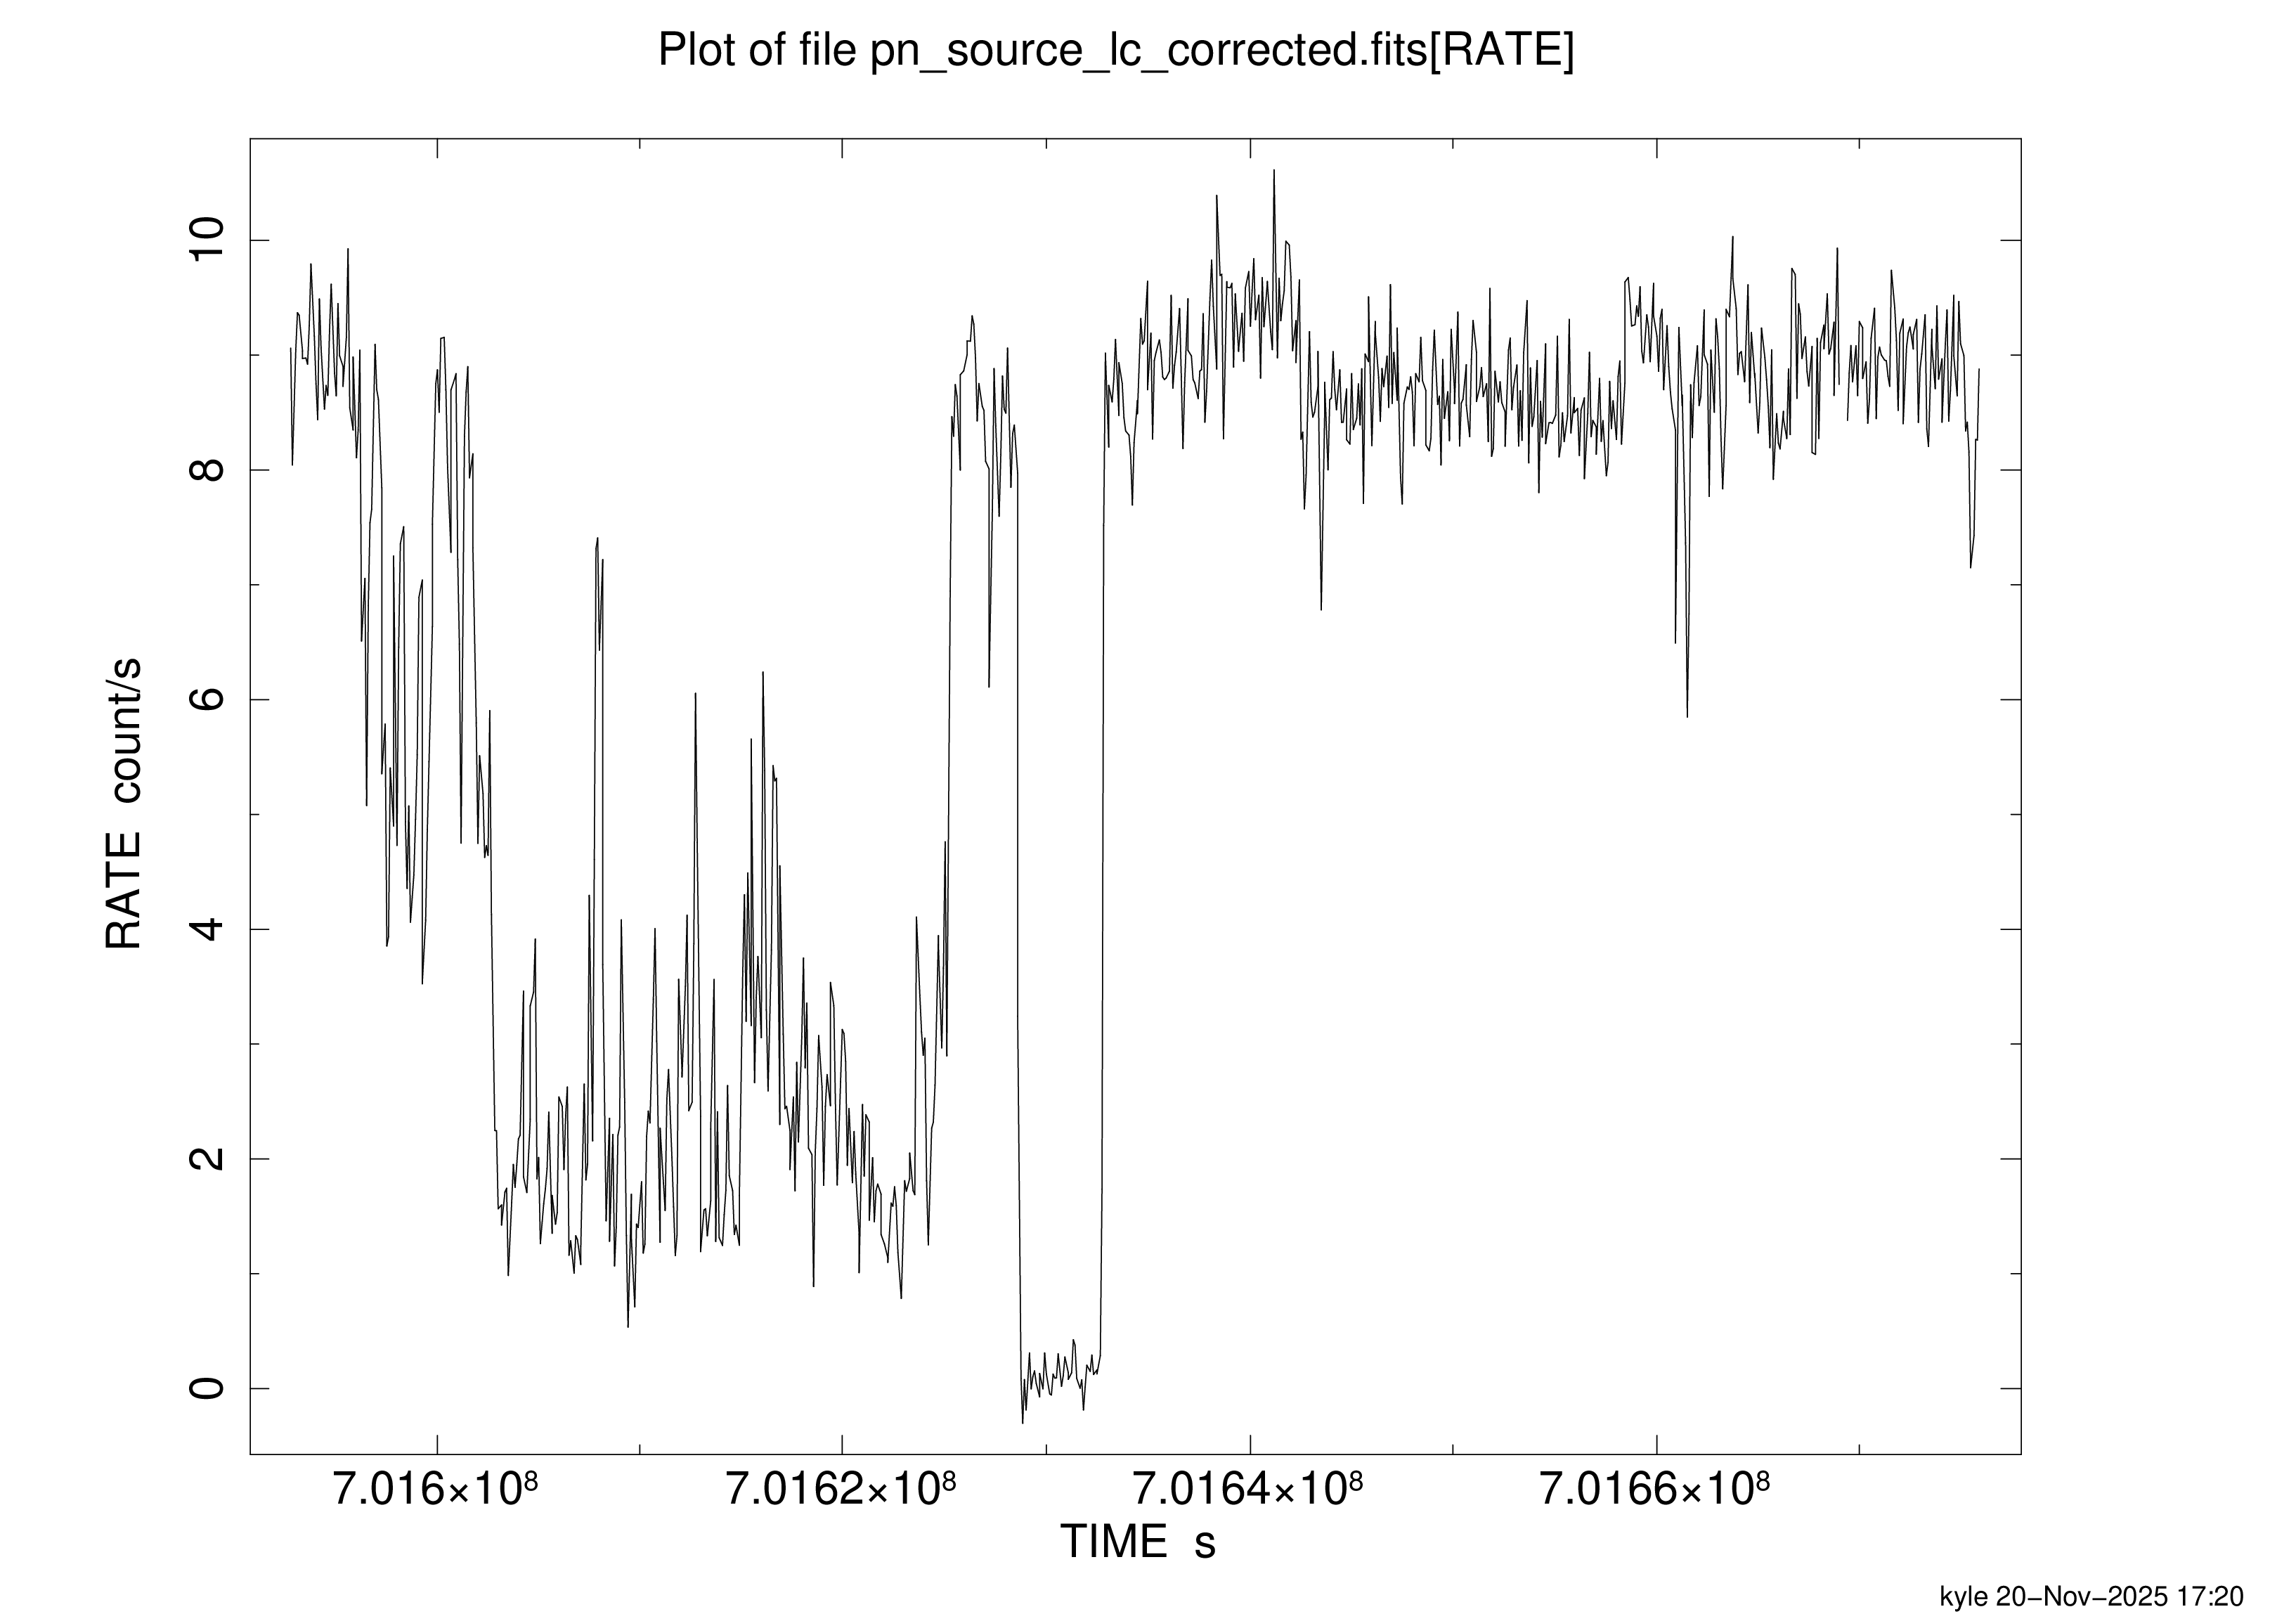

In [12]:
# Define path to the final corrected lightcurve plot

lc_plot_path = f"{project_root}/products/{obsid}/pn/lc/pn_source_lc_corrected.png"

if os.path.exists(lc_plot_path):
    img = Image.open(lc_plot_path)
    rotated = img.rotate(-90, expand=True)  # rotate 90 degrees anticlockwise
    buf = BytesIO()
    rotated.save(buf, format='PNG')
    buf.seek(0)
    print(f"Displaying final corrected lightcurve: {lc_plot_path}")
    display(IPyImage(data=buf.getvalue(), width=800))
else:
    print(f"ERROR: Plot not found at {lc_plot_path}")




The script has finished successfully. The primary data reduction for the EPIC-pn observation is now complete.

All science-ready files are located in products/0865600201/pn/:

    For Spectral Fitting (in spec/):

        pn_source_spectrum_grp.fits

        pn_bkg_spectrum.fits

        pn_rmf.rmf

        pn_arf.arf

    For Timing Analysis (in lc/):

        pn_source_lc_corrected.fits

These files are now ready to be loaded into analysis tools like XSPEC.